In [2]:
# ensure classes imported from .py files are dynamically updated
%load_ext autoreload
%autoreload 2

# plot matplots nicely
%matplotlib inline  

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
from climate_drought import utils

In [4]:
import glob
#flist=glob.glob('input/spg03/spg03*.nc')
flist=glob.glob('input/smant/sma*.nc')
#flist = glob.glob('input/fpanv/f*.nc')
len(flist)

23

In [5]:
xr.open_dataset(flist[0])

<xarray.Dataset>
Dimensions:  (time: 8, lat: 1800, lon: 3600)
Coordinates:
  * lat      (lat) float64 -89.95 -89.85 -89.75 -89.65 ... 89.75 89.85 89.95
  * lon      (lon) float64 -179.9 -179.8 -179.8 -179.7 ... 179.8 179.8 179.9
  * time     (time) datetime64[ns] 2023-01-01 2023-01-11 ... 2023-03-11
Data variables:
    smand    (time, lat, lon) float32 ...
    4326     float32 ...
Attributes: (12/28)
    Source_Software:            dbinterface.py, dbexport.py, netcdf_handling.py
    creator_name:               Carolina Arias Munoz
    Conventions:                CF-1.6
    _CoordSysBuilder:           ucar.nc2.dataset.conv.CF1Convention
    date_created:               2023-04-03
    01.title:                   Ensemble Soil Moisture Anomaly (2M, Lisflood+...
    ...                         ...
    18.factsheet_url:           https://edo.jrc.ec.europa.eu/documents/factsh...
    19.jrc_data_catalogue_url:  http://data.europa.eu/89h/f4af9315-9581-4403-...
    20.sample_url:              /images/map_examples/dbio_data_previews/smant...
    21.metadata_last_updated:   2023-02-09
    22.values_legend:           [Less than or equal to -2, -2 to -1.5, -1.5 t...
    23.version_notes:           Current version: Version 3.0.1 covers data fr...

In [6]:
dses = [xr.open_dataset(fname).sel(lat=62,lon=-100,method='nearest').drop_vars(['lat','lon','4326']) for fname in flist]

In [7]:
df = xr.merge(dses).to_dataframe()

<Axes: xlabel='time'>

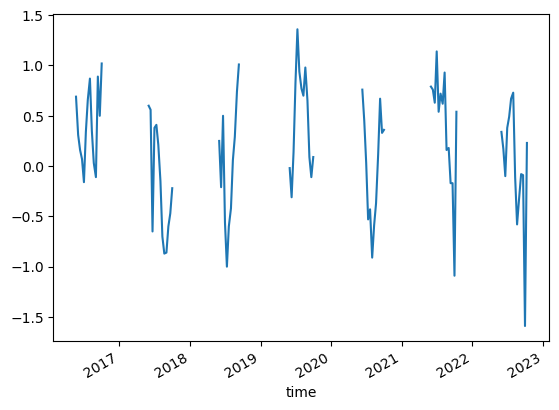

In [11]:
df[(df.index > pd.Timestamp(2016,4,16)) & (df.index < pd.Timestamp(2022,12,31))].smant.plot()

In [9]:
sdate = '20200101'
edate = '20230101'
daterange = utils.daterange(sdate,edate,rtv=False)

In [ ]:
def fill_gaps(sdate,edate,df):
    dti = pd.date_range(sdate,edate,freq='1D')
    dti_dekads = utils.dti_to_dekads(dti)
    gaps = dti_dekads[~dti_dekads.isin(df.index)]
    if len(gaps) > 0:
        df_gaps = pd.DataFrame(index=gaps)
        return pd.concat([df,df_gaps])
    else:
        return df

In [10]:
dti = pd.date_range(sdate,edate,freq='1D')

In [11]:
dti_dekads = utils.dti_to_dekads(dti)

In [12]:
dti_dekads

DatetimeIndex(['2020-01-01', '2020-01-11', '2020-01-21', '2020-02-01',
               '2020-02-11', '2020-02-21', '2020-03-01', '2020-03-11',
               '2020-03-21', '2020-04-01',
               ...
               '2022-10-01', '2022-10-11', '2022-10-21', '2022-11-01',
               '2022-11-11', '2022-11-21', '2022-12-01', '2022-12-11',
               '2022-12-21', '2023-01-01'],
              dtype='datetime64[ns]', length=109, freq=None)

In [13]:
gaps = dti_dekads[~dti_dekads.isin(df.index)]

In [22]:
df_gaps = pd.DataFrame(index=gaps)

In [23]:
pd.concat([df,df_gaps])

,smand,smant
2001-01-01,NaN,1.25
2001-01-11,NaN,1.02
2001-01-21,NaN,0.67
2001-02-01,NaN,0.35
2001-02-11,NaN,0.41
...,...,...
2022-11-11,NaN,NaN
2022-11-21,NaN,NaN
2022-12-01,NaN,NaN
2022-12-11,NaN,NaN


In [32]:
d = dti.day - np.clip((dti.day-1) // 10, 0, 2)*10 - 1
date = dti.values - np.array(d, dtype="timedelta64[D]")

In [41]:
np.unique(date)

array(['2020-01-01T00:00:00.000000000', '2020-01-11T00:00:00.000000000',
       '2020-01-21T00:00:00.000000000', '2020-02-01T00:00:00.000000000',
       '2020-02-11T00:00:00.000000000', '2020-02-21T00:00:00.000000000',
       '2020-03-01T00:00:00.000000000', '2020-03-11T00:00:00.000000000',
       '2020-03-21T00:00:00.000000000', '2020-04-01T00:00:00.000000000',
       '2020-04-11T00:00:00.000000000', '2020-04-21T00:00:00.000000000',
       '2020-05-01T00:00:00.000000000', '2020-05-11T00:00:00.000000000',
       '2020-05-21T00:00:00.000000000', '2020-06-01T00:00:00.000000000',
       '2020-06-11T00:00:00.000000000', '2020-06-21T00:00:00.000000000',
       '2020-07-01T00:00:00.000000000', '2020-07-11T00:00:00.000000000',
       '2020-07-21T00:00:00.000000000', '2020-08-01T00:00:00.000000000',
       '2020-08-11T00:00:00.000000000', '2020-08-21T00:00:00.000000000',
       '2020-09-01T00:00:00.000000000', '2020-09-11T00:00:00.000000000',
       '2020-09-21T00:00:00.000000000', '2020-10-01

In [23]:
dekads = utils.to_dekads(pd.DataFrame(np.zeros(len(daily_times)),index=daily_times)).index

In [12]:
df = df.loc[(df.index >= '20200101') & (df.index <= '20221231')]

<Axes: xlabel='time'>

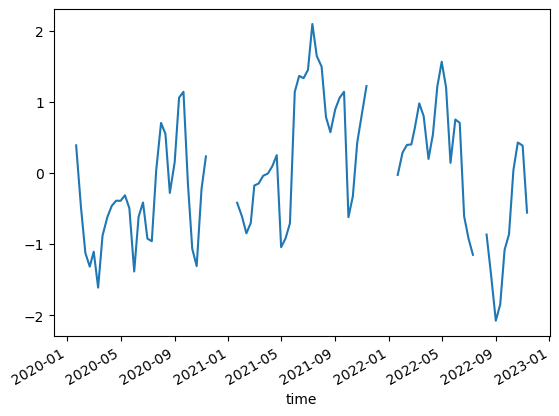

In [26]:
df.fpanv.plot()

In [24]:
df.fpanv.fillna(df.fapan, inplace=True)
del df['fapan']
df

,fpanv
time,
2020-01-01,NaN
2020-01-11,NaN
2020-01-21,0.387
2020-02-01,-0.484
2020-02-11,-1.126
...,...
2022-11-11,-0.559
2022-11-21,NaN
2022-12-01,NaN


In [20]:
df = ds.drop_vars(['lat','lon','4326']).to_dataframe()

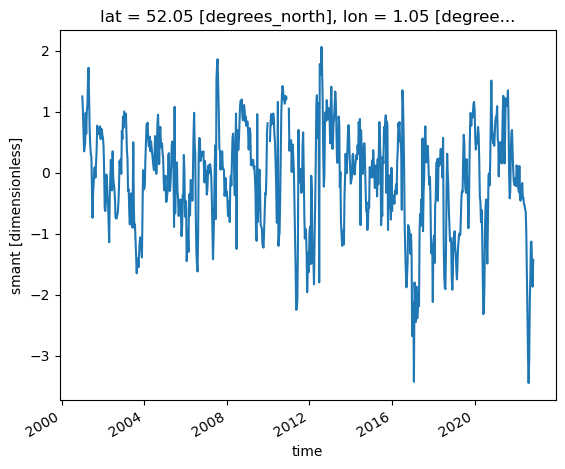

In [28]:
ds.smant.plot()

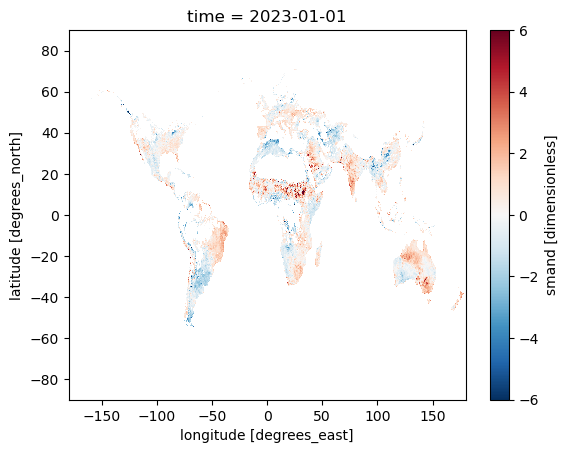

In [11]:
ds.isel(time=0).smand.plot()